###Loading CIFAR10 dataset

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import random
from PIL import Image, ImageEnhance 
import copy

In [153]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
    ]
)

# Load dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)#, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)#, transform=transform)


# classes
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

used_categories = range(len(classes))

## USE CODE TO CHOSE PART OF DATASET
reduce_dataset = False
if reduce_dataset:
    used_categories = (0,9) # select classes

    classes = [classes[i] for i in used_categories]
    new_train_data = []
    new_train_labels = []

    new_test_data = []
    new_test_labels = []
    for i, t in enumerate(used_categories):
        new_train_data.append(trainset.data[np.where(np.array(trainset.targets) == t)])
        new_train_labels += [i for _ in range(new_train_data[-1].shape[0])]

        new_test_data.append(testset.data[np.where(np.array(testset.targets) == t)])
        new_test_labels += [i for _ in range(new_test_data[-1].shape[0])]

    new_train_data = np.concatenate(new_train_data, 0)
    trainset.data = new_train_data
    trainset.targets = new_train_labels

    new_test_data = np.concatenate(new_test_data, 0)
    testset.data = new_test_data
    testset.targets = new_test_labels


Files already downloaded and verified
Files already downloaded and verified


In [155]:
# salt and pepper

def salt_and_peper(arr,noise_percentage = 25):
  black = [0, 0, 0]
  white = [255, 255, 255]
  colors = [white,black]
  trainNoiseSalt = []
  trainNumpyCopy = copy.deepcopy(arr)
  for sample in trainNumpyCopy:
    length = len(sample[0]) #assume that those are squared
    for _ in range(int(noise_percentage/100*length*length)):
      rand_x = random.randint(0,length-1)
      rand_y = random.randint(0,length-1)
      rand_color = random.randint(0,1)
      sample[rand_x][rand_y] = colors[rand_color]
    trainNoiseSalt.append(Image.fromarray(sample))
  return trainNoiseSalt




In [158]:
# too dark
def darker(arr, darkness_level = 50):
  trainDarknessNoise = []
  for sample in arr:
    withNoise = np.floor_divide(sample, (100/darkness_level)).astype(np.uint8)
    trainDarknessNoise.append(Image.fromarray(withNoise))
  return trainDarknessNoise


In [159]:
#too bright

def brighter(arr, brightness_level = 150):
  brightness_level /= 100
  trainBrightNoise = []
  for sample in arr:
    enhancer = ImageEnhance.Brightness(Image.fromarray(sample))
    enhanced_im = enhancer.enhance(brightness_level)
    trainBrightNoise.append(enhanced_im)
  return trainBrightNoise


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, num_workers=2)
train_data_iter = iter(trainloader)
test_data_iter = iter(testloader)
print('used classes:', classes)

In [162]:
print("# Training data")
print("Number of points:", len(trainset))
x, y = next(iter(trainloader))
print("Dimension [C x H x W]:", x.shape[1:])
print("Number of distinct labels:", len(set(trainset.targets)))


print("\n# Test data")
print("Number of points:", len(testset))
x, y = next(iter(testloader))
print("Dimension [C x H x W]:", x.shape[1:])
print("Number of distinct labels:", len(set(testset.targets)))

# Training data
Number of points: 50000
Dimension [C x H x W]: torch.Size([3, 32, 32])
Number of distinct labels: 10

# Test data
Number of points: 10000
Dimension [C x H x W]: torch.Size([3, 32, 32])
Number of distinct labels: 10


In [175]:
# to numpy
trainNump = [np.array(sample[0]) for sample in trainset]
example = trainNump[0]

#salt_and_pepper
saltAndPepper = salt_and_peper(trainNump, noise_percentage=25)
dark = darker(trainNump, darkness_level=70)
bright = brighter(trainNump, brightness_level=160)

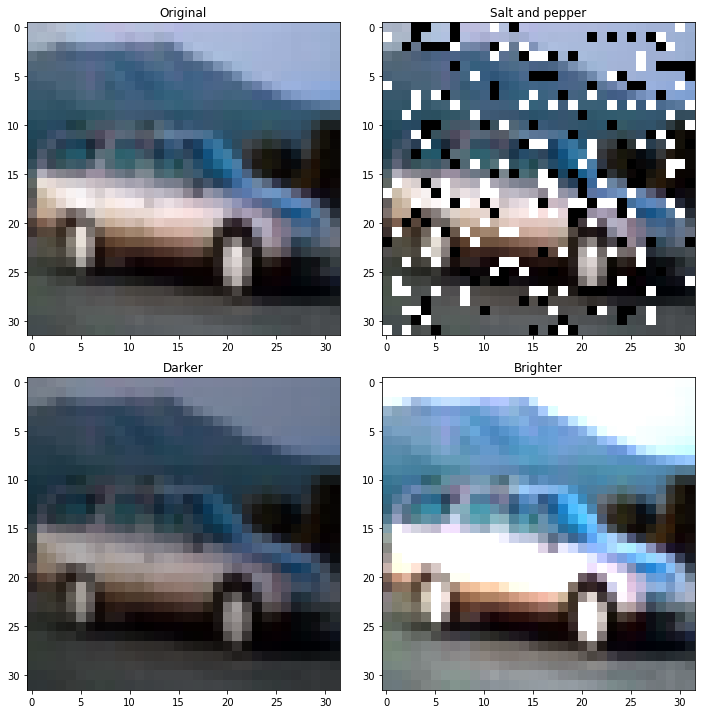

In [177]:
# Run this cell multiple time to see more samples

def imshow(img):
    """ show an image """
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
#images, labels = train_data_iter.next()

# show images
#imshow(torchvision.utils.make_grid(images))

# print labels
#print(f"{ classes[labels] }")

#random image 
random_ind = random.randint(0,31)

#plots
f, axarr = plt.subplots(2,2,figsize=[10,10])
f.tight_layout()

axarr[0,0].set_title("Original")
axarr[0,0].imshow(trainNump[random_ind])

axarr[0,1].set_title("Salt and pepper")
axarr[0,1].imshow(saltAndPepper[random_ind])

axarr[1,0].set_title("Darker")
axarr[1,0].imshow(dark[random_ind])

axarr[1,1].set_title("Brighter")
axarr[1,1].imshow(bright[random_ind])

